### PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.

In [1]:
what_were_covering = { 1: "data (prepare and load)",
                       2: "build model",
                       3: "fitting the model to data (training)",
                       4: "making predications and evaluating a model (inference)",
                       5: "saving and loading a model",
                       6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predications and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # neural network module, contains all of PyTorch's neural network building blocks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.6.0+cu124'

## 1. Data (preparing and loading)

Data can be almost anything in machine learning...
* Excel spreadsheet
* Images of any kind
* Videos 
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns into that numerical representation.

To showcase this, let's create some *known* data using linear regression formula.

The linear regression model can be represented as:

$$
Y_i = f(X_i, \beta) + e_i
$$

where:
- $Y_i$ is the dependent variable.
- $X_i$ is the independent variable.
- $\beta$ represents the unknown parameters.
- $e_i$ represents the error terms.
- $f$ is the function relating $X_i$ to $Y_i$.

We'll use a linear regression formula to make a straight line with *known* **parameters**.

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3 

# Create 
start = 0
end = 1 
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # unsqueeze adds a dimension to the tensor
y = weight * X + bias

X[:10], y[:10]
len(X), len(y)

(50, 50)

## Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data

In [4]:
# Create a train/test split
train_split = int(0.8 * len(X)) # 80% train, 20% test
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    # Are there any predictions?
    if predictions is not None:
        # Plot the predictions in red
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    # Show the legend
    plt.legend(prop={"size": 14})
    

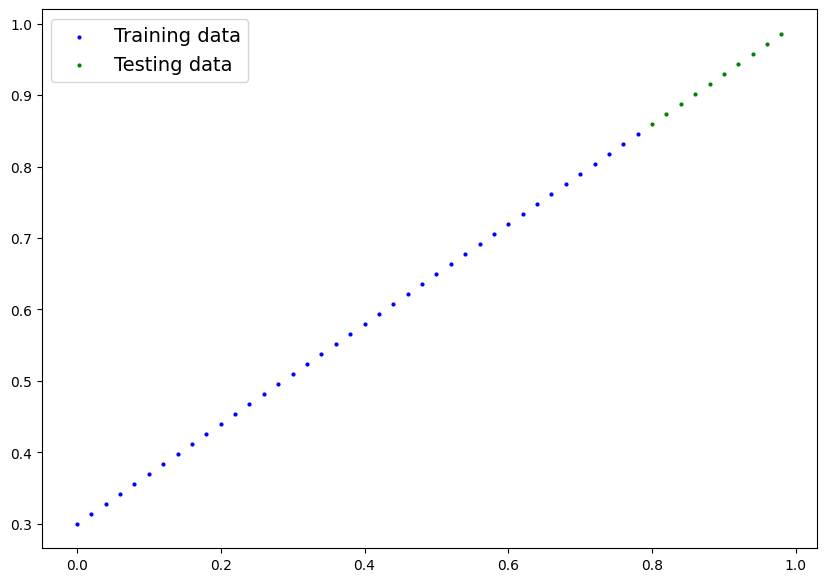

In [6]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

Python Classes OOP, reference: https://realpython.com/python-classes/

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data) 

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation 


In [7]:
from torch import nn
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a subclass of nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                                requires_grad=True, # <- this tells PyTorch to keep track of the gradients
                                                dtype=torch.float)) # <- set the data type to float
        
        self.bias = nn.Parameter(torch.randn(1, # <- start with a random bias and try to adjust it to the ideal bias
                                             requires_grad=True, # <- this tells PyTorch to keep track of the gradients
                                             dtype=torch.float)) # <- set the data type to float
        
        # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- 'x' is the input data
        return self.weights * x + self.bias # <- this is the linear regression formula (y = wx + b)

### PyTorch model building essentials

* `torch.nn` - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* `torch.nn.Parameter` - what parameters should our model try and learn, often a PyTorch layer will set these for us
* `torch.nn.Module` - The base class for all neural network modules, if you subclass it, you should overwrite forware()
* `torch.optim` - this is where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()` - All nn.Module sublasses require you to overwrite forward(), this method defines what hapens in the forward computation

See more of these essential modules via the PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now we've created a model, lets see whats inside....

So we can check our model parameters using `.parameters()`.

In [90]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model 
model_0 = LinearRegressionModel()

# Check the model's parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [91]:
# List name parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, its going to run it through the `forward()` method

In [92]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)
    
# Deprecated torch.no_grad()
# with torch.no_grad():
#     y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

See more on inference mode here - https://x.com/pytorch/status/1437838231505096708?s=20&t=cnKavO9iTgWQ-rfri6u7PQ

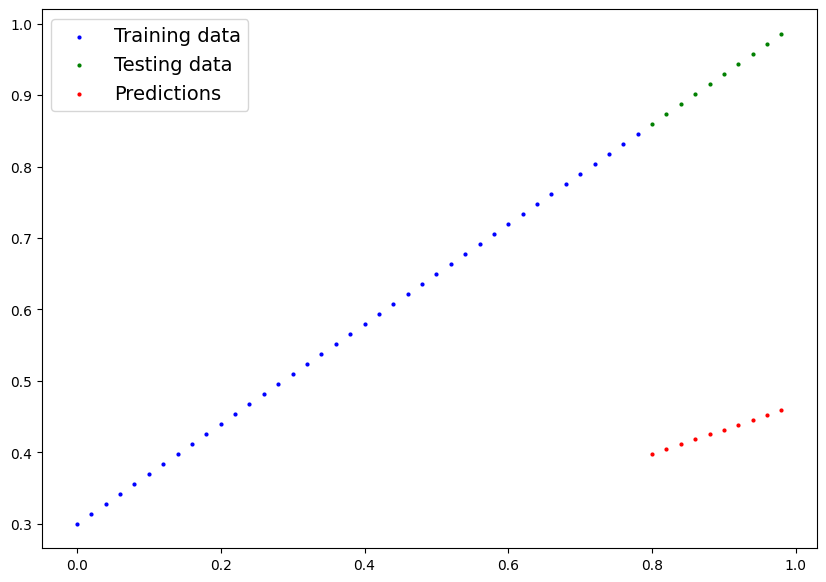

In [93]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* paramters (these may be random) to some *known* paramters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas.

Things we need to train:

* **Loss function:** A function to measure how wrong your models predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias) to imporve the loss function. - http://pytorch.org/docs/stable/generated/torch.optim.SGD.html

    * Inside the optimizer you'll often have to set two paramters:
        * `params` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
        * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [94]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [95]:
# Setup a loss function
loss_fn = nn.L1Loss() # <- L1 loss is also known as mean absolute error

# Setup an Optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(model_0.parameters(), # <- pass in the model parameters
                            lr=0.01) # <- learning rate = possibly the most important hyperparameter

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our models `forward()` function) to make predictions on data - also called 'forward propagation'
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our models parameters to try to imporve the loss (**gradient descent**)

PyTorch optimization loop song - https://www.youtube.com/watch?v=Nutpusq_AFw

In [96]:
torch.manual_seed(42)

# an epoch is one complete pass through the training data...
epochs = 201

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training the model
# 0. Loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train()
    
    # 1. Forward pass: compute predicted y by passing x to the model
    y_pred = model_0(X_train)
    
    # 2. Compute and print loss
    loss = loss_fn(y_pred, y_train)
    # print(f"Epoch {epoch} training loss: {loss.item()}")
    
    # 3. Zero gradients, backward pass, update weights
    optimizer.zero_grad()
    
    # 4. Perform backpropagation on the loss with respect to the model's parameters
    loss.backward()
    
    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # <- this tells the optimizer to adjust the model's weights and biases based on the gradients
    
    ### Testing the model
    # set the model to evaluation mode
    model_0.eval() 
    with torch.inference_mode():
        # 1. Forward pass
        test_pred = model_0(X_test)
        
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        print(model_0.state_dict())

Epoch 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

In [97]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

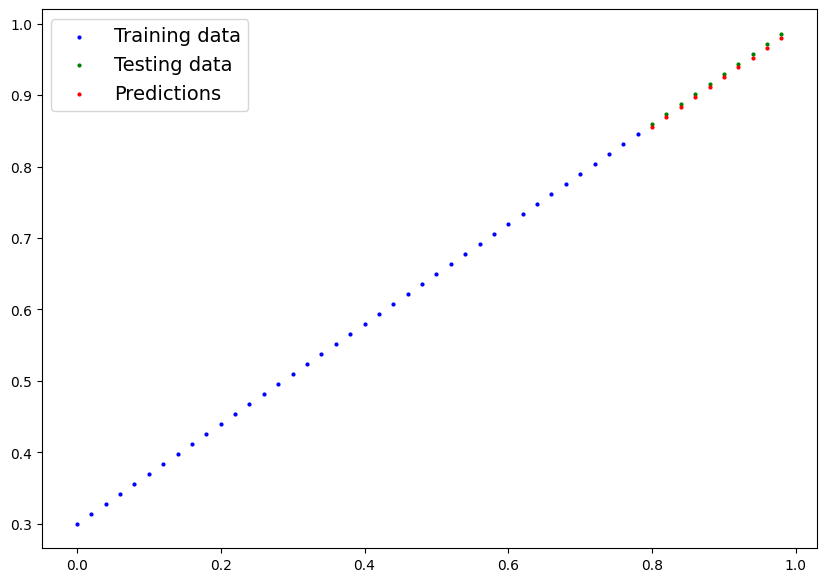

In [98]:
plot_predictions(predictions=y_preds_new)

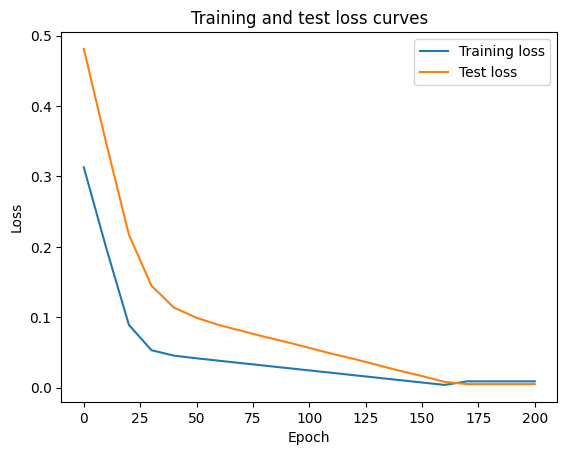

In [99]:
import numpy as np

# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Training loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

## Saving a model in PyTorch

There are three main methods you should know about for loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - allows you to load a models saved state dictionary

PyTorch save & load code tutorial - https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference

In [102]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model's state_dict
print(f"Saving model state dict at: {MODEL_SAVE_PATH}")
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

Saving model state dict at: models\01_pytorch_workflow_0.pth


## Loading a PyTorch model

since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [103]:
# Load the model
# To load in a saved state dict, you need to create a new model with the same parameters as the original model
loaded_model_0 = LinearRegressionModel()

# Load the state dict into the new model
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [104]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [105]:
# Make predictions with the loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
    
loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [107]:
# Make some model predictions
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

In [108]:
# Compare the loaded model's predictions to the original model's predictions
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])